Neighboring areas in Pittburgh tend to lean towards certain occupations, usually based on a specific area. Whether its because the area is closer to one particular occupation or not, it is still worth noting as it influences how and where you live. Jobs are the focal point of living your life, so its important to know what jobs are most often employed based on what area you are in, as it gives you more opportunities to prepare and connect with your jobs easier.

In 2010, WPRDC (https://data.wprdc.org/dataset/pgh) has recorded a dataset of the percent of occupations from the total population of that neighboring area. They have also recorded the number of people over 16 and employed, to show which ones actually had a job, as such the remaining population is not employed, hense does not work. It has also listed what sector the area is in as many areas are closely grouped together in a larger scale of Pittsburgh. There are a total of 90 areas recorded.

In [2]:
import pandas as pd

df = pd.read_excel("employment.xls")
df

,Neighborhood,Sector #,Population (2010),Total Age 16+ N'hood Residents Employed (2010 Est.),Resident Jobs: Construction,Resident Jobs: Manufacturing,Resident Jobs: Retail Trade,"Resident Jobs: Transportation, warehousing, utilities",Resident Jobs: Information,"Resident Jobs: Finance, insurance, real estate",...,Jobs in 'Hood: Manufacturing,Jobs in 'Hood: Retail trade,"Jobs in 'Hood: Transport, warehousing, utilities",Jobs in 'Hood: Information,"Jobs in 'Hood: Finance, insurance, real estate","Jobs in 'Hood: Prof, scientific, admin, and waste mgmt","Jobs in 'Hood: Educ, health, and social svc","Jobs in 'Hood: Arts, ent, recreation, accommodation and food services",Jobs in 'Hood: Public admin,Jobs in 'Hood: Other
0,Allegheny Center,3,933,386,0.031088,0.018135,0.119171,0.000000,0.000000,0.103627,...,0.094270,0.017560,0.076710,0.085028,0.212569,0.093346,0.257856,0.066543,0.020333,0.044362
1,Allegheny West,3,462,151,0.000000,0.066225,0.000000,0.145695,0.000000,0.000000,...,0.123648,0.030912,0.003091,0.007728,0.065688,0.038640,0.486862,0.046368,0.019320,0.166151
2,Allentown,6,2500,858,0.041958,0.078089,0.118881,0.055944,0.023310,0.083916,...,0.000000,0.309859,0.084507,0.000000,0.042254,0.084507,0.140845,0.084507,0.028169,0.154930
3,Arlington,7,1869,685,0.071533,0.129927,0.122628,0.017518,0.049635,0.008759,...,0.064516,0.000000,0.000000,0.064516,0.000000,0.000000,0.645161,0.000000,0.000000,0.064516
4,Arlington Heights,7,244,72,0.000000,0.000000,0.138889,0.000000,0.000000,0.291667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,13,2669,1191,0.008396,0.074727,0.149454,0.067170,0.000000,0.130143,...,0.111789,0.208333,0.177846,0.015244,0.030488,0.004065,0.020325,0.040650,0.025407,0.142276
86,West End,4,254,64,0.000000,0.171875,0.000000,0.000000,0.000000,0.171875,...,0.194444,0.144444,0.000000,0.027778,0.061111,0.105556,0.022222,0.072222,0.105556,0.100000
87,West Oakland,14,2604,834,0.043165,0.004796,0.058753,0.033573,0.000000,0.025180,...,0.013183,0.010469,0.004653,0.002714,0.007755,0.030632,0.882513,0.013183,0.006204,0.012796
88,Westwood,4,3066,1623,0.027110,0.168207,0.101664,0.020949,0.008626,0.091805,...,0.049774,0.244344,0.022624,0.018100,0.027149,0.190045,0.162896,0.063348,0.027149,0.117647


While getting every job percentage would be nice, its not exactly the best use of our data as we are only doing it in a smaller scale, so we will instead just look at just the percentage of people employed based on the total population of the area, and the number of people employed.

In [6]:
#get only these 3 specific columns
pop = df[["Neighborhood", "Population (2010)", "Total Age 16+ N'hood Residents Employed (2010 Est.)"]]
pop

,Neighborhood,Population (2010),Total Age 16+ N'hood Residents Employed (2010 Est.)
0,Allegheny Center,933,386
1,Allegheny West,462,151
2,Allentown,2500,858
3,Arlington,1869,685
4,Arlington Heights,244,72
...,...,...,...
85,Upper Lawrenceville,2669,1191
86,West End,254,64
87,West Oakland,2604,834
88,Westwood,3066,1623


In [45]:
percentage = [] #empty list
for i in pop.iterrows():
    percentage.append(i[1][2]/i[1][1]) #get ratio of employed/total population
    
ratio = pd.DataFrame({"Neighborhood": pop["Neighborhood"], "Percentage": percentage})
ratio = ratio[ratio['Percentage'] <= 1] #in the case the number of people employed is greater than the population, drop it
ratio = ratio.sort_values(by=['Percentage'], ascending=False)
ratio

,Neighborhood,Percentage
73,Spring Garden,0.755656
54,New Homestead,0.744444
64,Polish Hill,0.738619
65,Regent Square,0.707974
71,South Side Flats,0.670759
...,...,...
10,Bluff,0.225909
26,East Carnegie,0.191228
35,Glen Hazel,0.124302
31,Fairywood,0.116766


Now its done! But thats alot of neighborhoods, why don't we make it more presentable to the eye?

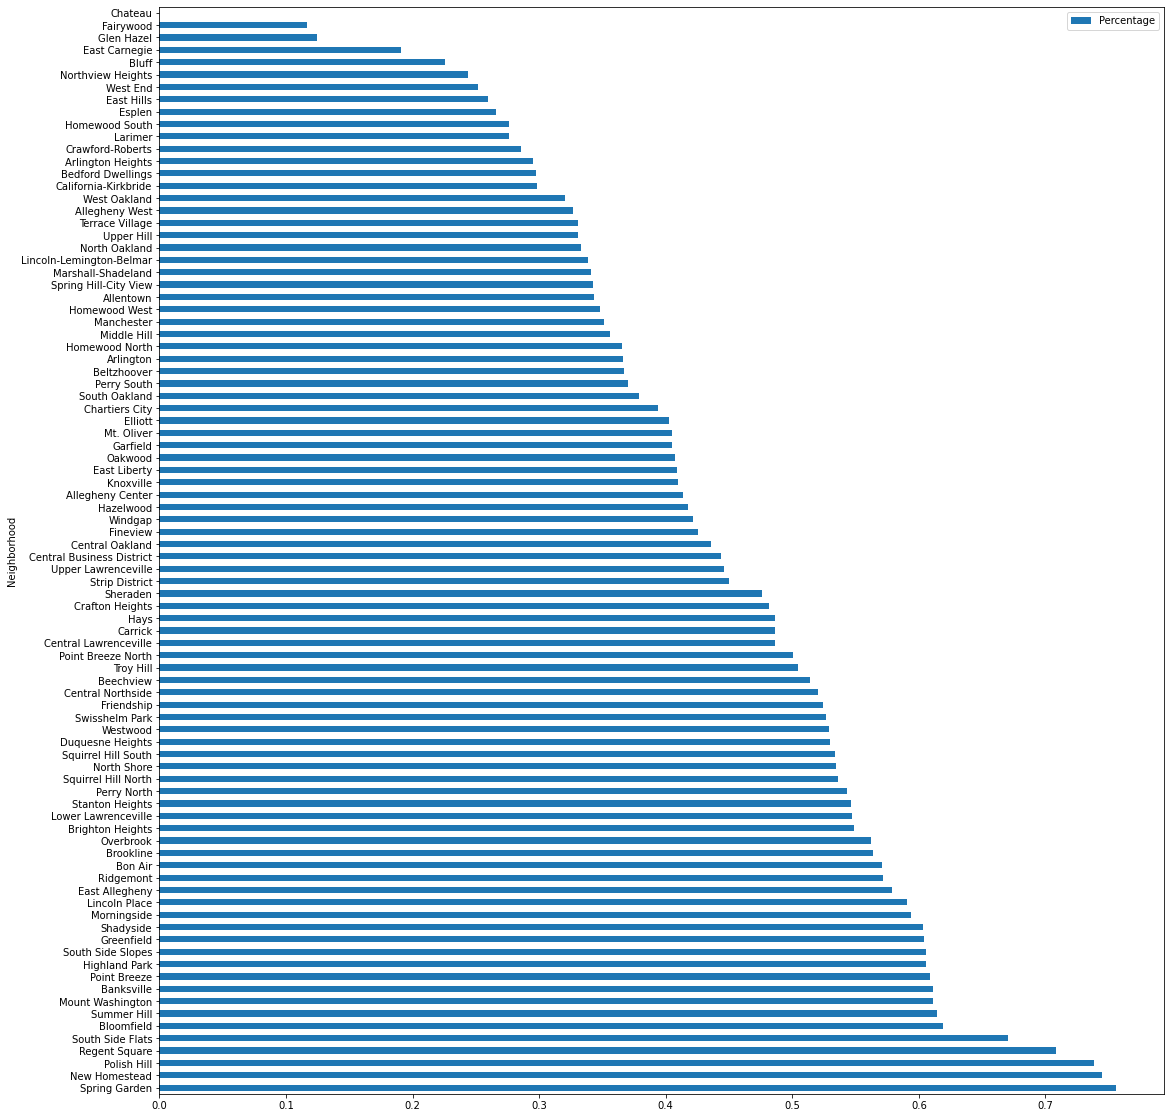

In [46]:
ax = ratio.plot.barh(x='Neighborhood', y='Percentage', figsize=(18,20))

As seen here, it seems like Spring Garden has the highest employment ratio of .75! It is followed by New Homestead, Polish Hill, and Regent Square. The worst is Chateau, with zero percent, followed by Fairywood, Glen Hazel, and East Carnegie.